In [14]:
# Enable intelliense
%config IPCompleter.greedy=True

import json

list = [ 'air', 'alcohol', 'coffee']

# get label for the data
dir = 'enose-data/'
csvFilename = dir + 'psec2-data.csv'
f = open(csvFilename, "w")

header = "sensor_id,time,temperature,pressure,humidity,gas_resistance,smell"
    
#print('-'*60)
#print(header)
f.write(header + '\n')

for item in range(len(list)):

    # convert collected json data into a csv file
    jsonFilename = dir + list[item] + '.json'

    parsed_json = ""
    with open(jsonFilename) as json_file:
      parsed_json = json.load(json_file)

    #print(parsed_json)
    i = 0
    for block in parsed_json['dataBlock']:
        #print(block)
        #break
        for data in block['datapoints']:
            #print(data)
            result = ''
            #print(range(len(data) - 1))
            for x in data:
                result += str(x) + ','
        
            result += list[item]
            #print(result)
            f.write(result + '\n')
    
f.close()



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import pickle 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm
from matplotlib.colors import ListedColormap

In [4]:
# read csv file into dataFrame
dataset = pd.read_csv(csvFilename)
print(str(len(dataset)) + ' records')
print(dataset.head())

14400 records
   sensor_id     time  temperature     pressure   humidity  gas_resistance  \
0          0  2869500    28.459225  1016.180603  34.376034   120413.921875   
1          1  2869556    28.517452  1016.351135  34.103622   110942.578125   
2          2  2869611    28.915897  1016.183594  33.742943    89229.695312   
3          3  2869666    29.000937  1016.153625  33.607368   104553.804688   
4          4  2869721    29.528896  1016.609131  33.937214    86428.085938   

  smell  
0   air  
1   air  
2   air  
3   air  
4   air  


In [5]:
# split dataset
# 'Temperature','Pressure','Relative Humidity','Resistance Gassensor','Label Tag'
X = dataset.loc[:,['humidity', 'gas_resistance']]
y = dataset.loc[:, ['smell']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32767, test_size=0.2)


In [6]:
print(len(X_train))
print('-'*30)
print(X_train.head())
print('-'*30)
print(len(y_train))
print('-'*30)
print(y_train.head())
print(len(X_test))
print('-'*30)
print(X_test.head())
print(len(y_test))
print('-'*30)
print(y_test.head())

print('-'*30)
list = y_test['smell'].values.tolist()
print('air     :' + str(list.count('air')))
print('alcohol :' + str(list.count('alcohol')))
print('coffee  :' + str(list.count('coffee')))
#print('tea     :' + str(list.count('tea')))

11520
------------------------------
        humidity  gas_resistance
12230  16.921288    12771.901367
7050   43.223774    13380.723633
12910  16.848557    12711.022461
12711  16.608511    27101.417969
11224  17.344715    42146.855469
------------------------------
11520
------------------------------
         smell
12230   coffee
7050   alcohol
12910   coffee
12711   coffee
11224   coffee
2880
------------------------------
        humidity  gas_resistance
6292   44.205620    13805.003906
10509  17.540672    32964.203125
13337  16.478479    39714.550781
7527   45.228477     9641.458008
9907   18.696119    34905.917969
2880
------------------------------
         smell
6292   alcohol
10509   coffee
13337   coffee
7527   alcohol
9907    coffee
------------------------------
air     :948
alcohol :922
coffee  :1010


        humidity  gas_resistance
6292   44.205620    13805.003906
10509  17.540672    32964.203125
13337  16.478479    39714.550781
7527   45.228477     9641.458008
9907   18.696119    34905.917969
...          ...             ...
9730   19.578146    30018.761719
760    34.182091   129064.781250
8767   44.818279     8634.646484
4589   33.428303   143497.765625
5961   43.229530    14883.720703

[2880 rows x 2 columns]
[[0.93389009 0.04438666]
 [0.05012971 0.1679108 ]
 [0.01492529 0.21143198]
 ...
 [0.95419554 0.01105208]
 [0.57669585 0.88054828]
 [0.90153939 0.05134142]]
------------------------------
                  0             1
count  11520.000000  11520.000000
mean       0.519473      0.297067
std        0.366693      0.304802
min        0.000000      0.000000
25%        0.044868      0.042692
50%        0.583613      0.164597
75%        0.894625      0.618498
max        1.000000      1.000000
------------------------------


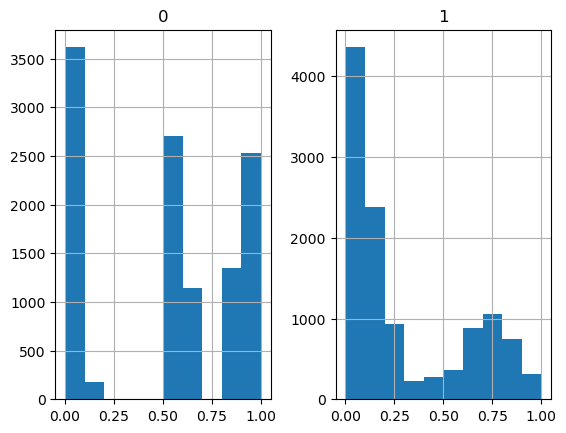

In [7]:
#Feature scaling
sc_X = MinMaxScaler()
#print(X_test)
X_trainSc = sc_X.fit_transform(X_train)
X_testSc = sc_X.transform(X_test)
#X_trainSc = X_train
#X_testSc = X_test

print(X_test)
print(X_testSc)

tmpdf = pd.DataFrame(X_trainSc)
print('-'*30)
print(tmpdf.describe())

# show histograms of the features
print('-'*30)
tmpdf.hist()
plt.show()


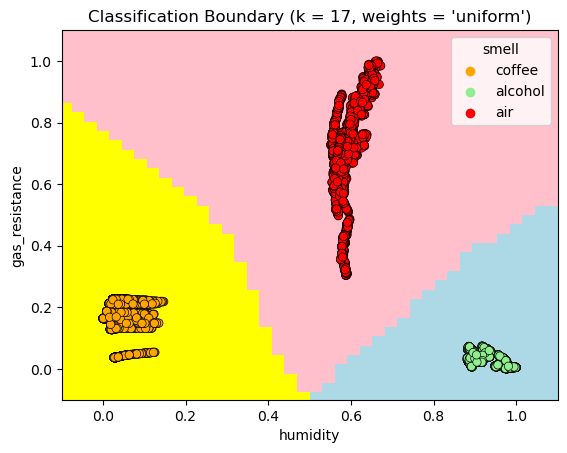

In [8]:
# Nearest Neighbors classification decision boundaries
N_NEIGHBORS = 17

# Create color maps
cmap_light = ListedColormap(["pink", "lightblue", "yellow"])
cmap_bold = ["orange", "lightgreen", "red"]

# create K Neighbours Classifier and fit data.
classifier = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, p=2,metric='euclidean', weights='uniform')
classifier.fit(X_trainSc, y_train['smell'].values.tolist())

# plot boundaires
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    classifier,
    X_trainSc,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=X.columns[0],
    ylabel=X.columns[1],
    shading="auto",
)

# Plot training points
scatter = sns.scatterplot(
    x=X_trainSc[:, 0],
    y=X_trainSc[:, 1],
    hue=y_train['smell'],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
scatter.set_xlim(left=-0.1, right=1.1)
scatter.set_ylim(bottom=-0.1, top=1.1);
    
plt.title(
    "Classification Boundary (k = %i, weights = '%s')" % (N_NEIGHBORS, 'uniform')
)

plt.show()

In [9]:
# Predict the test set results
y_pred = classifier.predict(X_testSc)
print(y_pred)

['alcohol' 'coffee' 'coffee' ... 'alcohol' 'air' 'alcohol']


[[ 948    0    0]
 [   0  922    0]
 [   0    0 1010]]
f1_score       : [1. 1. 1.]
accuracy_score : 1.0


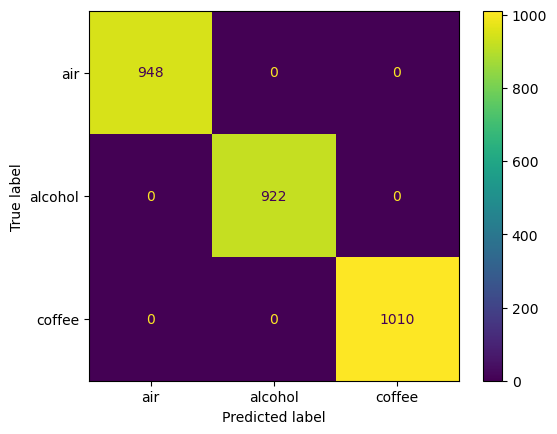

In [18]:
labels = ['air', 'alcohol', 'coffee']
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
print('f1_score       : ' + str(f1_score(y_test, y_pred, average=None)))
print('accuracy_score : ' + str(accuracy_score(y_test, y_pred)))

In [11]:
# Save model in binary mode
modelFilename = 'enoseModel.pkl'
enosePickle = open(modelFilename, 'wb') 
      
# source, destination 
pickle.dump(classifier, enosePickle)  

# close the file
enosePickle.close()
                

In [12]:
# Save fitted standardscaler in binary mode
scFilename = 'enoseSc.pkl'
scPickle = open(scFilename, 'wb') 
      
# source, destination 
pickle.dump(sc_X, scPickle)  

# close the file
scPickle.close()

MinMaxScaler()
KNeighborsClassifier(metric='euclidean', n_neighbors=17)
[[ 948    0    0]
 [   0  922    0]
 [   0    0 1010]]
f1_score      : [1. 1. 1.]
accuracy_score: 1.0


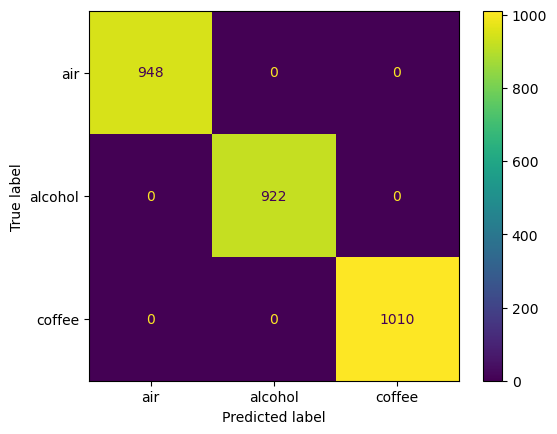

In [13]:
# reload the model and scaler. Use them to run the smell detection using the same test data
# to see if we get the same results as before

# load the StandardScaler from disk and transform X_test
loaded_ss = pickle.load(open(scFilename, 'rb'))
print(loaded_ss)
X_testSs = loaded_ss.transform(X_test)
#X_testSs = X_test

# load the model from disk
loaded_model = pickle.load(open(modelFilename, 'rb'))
print(loaded_model)
y_pred = loaded_model.predict(X_testSs)

# the confusion matrix hould be exactly the same as the previous one
labels = ['air', 'alcohol', 'coffee']
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
print('f1_score      : ' + str(f1_score(y_test, y_pred, average=None)))
print('accuracy_score: ' + str(accuracy_score(y_test, y_pred)))
